In [1]:
# Imports
import jeans

import numpy as np
import matplotlib.pyplot as plt

The total dark matter rotation curve is accesses via the method V(r, Lmax) which takes an r array/list and the maximum L modes of the denisty, $\rho_{\ell m}$. Lmax=0 gives the spherical approximation. 

For example, we display two SIDM + baryon profiles with and without adiabatic contraction. We then compare Lmax=0 and Lmax=2 profiles. 

In the final example we show how to access the components of the rotation curve, i.e. the dark matter and the baryons and plot them separately. 

In [2]:
M200 = 1e12 # virial mass, Msun
c = 10 # concentration, dimensionless
q0 = 0.8 # spherical axis ratio, dimensionless
r1 = 20 # kpc
AC_inputs = {'AC_prescription':'Cautun'}

# Example baryonic potential: Miyamoto-Nagai disk
def Phi_b(r, th):
    GN = 4.302e-6 # kpc Msun^-1 (km/s)^2
    Md = 6.4e10
    a = 3.5
    b = 0.53
    return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)

profile_noAC = jeans.squashed(r1, M200, c, q0=q0, Phi_b=Phi_b)

profile_AC = jeans.squashed(r1, M200, c, q0=q0, Phi_b=Phi_b, **AC_inputs)

# Rotation Curve for Analytic Baryon Potential with and without Adiabatic Contraction

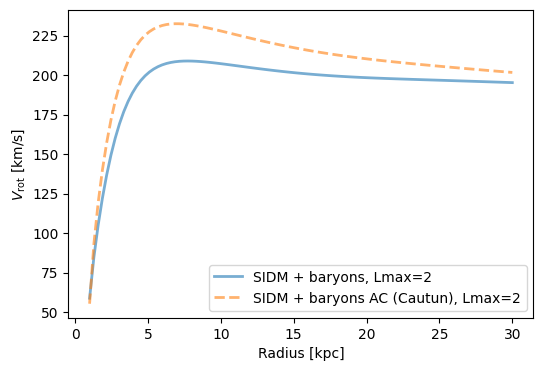

In [4]:
r = np.linspace(1,30,num=100)
plt.figure(figsize=(6,4))

plt.plot(r, profile_noAC.V(r, Lmax=2), label='SIDM + baryons, Lmax=2', alpha=0.6, ls='-', lw=2)
plt.plot(r, profile_AC.V(r, Lmax=2), label='SIDM + baryons AC (Cautun), Lmax=2', alpha=0.6, ls='--', lw=2)
plt.xlabel('Radius [kpc]')
plt.ylabel(r'$V_{\rm rot}$ [km/s]')
plt.legend()

plt.show()

# Comparing the Lmax=0 and Lmax=2

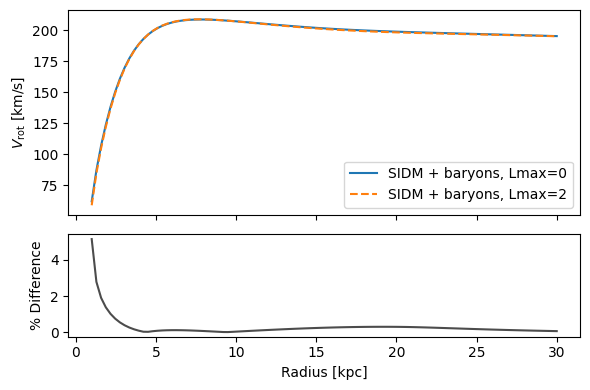

In [5]:
r = np.linspace(1,30,num=100)

v_circ_L0 = profile_noAC.V(r, Lmax=0)
v_circ_L2 = profile_noAC.V(r, Lmax=2)
residuals_percent = 100 * (np.abs(v_circ_L2 - v_circ_L0) / v_circ_L0)

fig, (ax_main, ax_res) = plt.subplots(
    2, 1,
    figsize=(6, 4),
    sharex=True,
    gridspec_kw={'height_ratios': [2, 1]}
)

ax_main.plot(r, v_circ_L0, c='C0', ls='-', label="SIDM + baryons, Lmax=0")
ax_main.plot(r, v_circ_L2, c='C1', ls='--', label="SIDM + baryons, Lmax=2")
ax_main.set_ylabel("$V_{\\rm rot}$ [km/s]")
ax_main.legend()

plt.setp(ax_main.get_xticklabels(), visible=False)

ax_res.plot(r, residuals_percent, c='k', alpha=0.7)
ax_res.set_xlabel("Radius [kpc]")
ax_res.set_ylabel("% Difference")

plt.tight_layout()
plt.show()

# Components of the Rotation Curve

The rotation curve includes contribution from the baryons and the dark matter. You can access the components in the following way. 

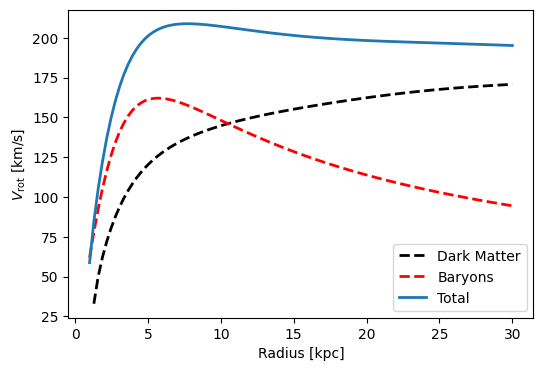

In [6]:
r = np.linspace(1,30,num=100)

vcirc_DM = profile_noAC.Vdm(r, Lmax=2)
vcirc_baryons = profile_noAC.V_baryon(r)
vcirc = profile_noAC.V(r, Lmax=2)

plt.figure(figsize=(6,4))
plt.plot(r, vcirc_DM, c='k', label='Dark Matter', ls='--', lw=2)
plt.plot(r, vcirc_baryons, c='r', label='Baryons', ls='--', lw=2)
plt.plot(r, vcirc, c='C0', label='Total', ls='-', lw=2)
plt.xlabel('Radius [kpc]')
plt.ylabel(r'$V_{\rm rot}$ [km/s]')
plt.legend()
plt.show()